<a href="https://colab.research.google.com/github/viktoriia-vi/Python-Movie-Correlation-Analysis/blob/main/Pilot_Analysis_Employee_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to BigQuery

In [1]:
from google.cloud import bigquery
from google.colab import auth

# authenticate
auth.authenticate_user()

# initialize the client for BigQuery
project_id = 'crafty-valve-453917-s3'
client = bigquery.Client(project = project_id, location = 'US')

In [3]:
# access dataset and table
dataset_ref = client.dataset('employeedata', project = project_id)
dataset = client.get_dataset(dataset_ref)

table_ref = dataset.table('tbl_hr_data')
table = client.get_table(table_ref)

new_table_ref = dataset.table('tbl_new_employees')
new_table = client.get_table(new_table_ref)

In [4]:
# Convert to dataframe
df = client.list_rows(table=table).to_dataframe()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.38,0.53,2,157,3,0,1,0,sales,low,EMP00001
1,0.80,0.86,5,262,6,0,1,0,sales,medium,EMP00002
2,0.11,0.88,7,272,4,0,1,0,sales,medium,EMP00003
3,0.72,0.87,5,223,5,0,1,0,sales,low,EMP00004
4,0.37,0.52,2,159,3,0,1,0,sales,low,EMP00005


In [14]:
df2 = client.list_rows(table=new_table).to_dataframe()
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.537849,0.122914,2,208,2,0,0,0,IT,high,NE15043
1,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
2,0.555186,0.555949,2,187,3,0,0,0,RandD,medium,NE15035
3,0.605273,0.713086,2,218,3,0,0,0,RandD,high,NE15069
4,0.043437,0.162372,2,175,3,0,0,0,RandD,high,NE15082


# Build Model

### Install Pycaret


In [5]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 80.7 MB/s eta 0:00:00
   ━━━━━

# Code and Train Model

In [6]:
# get our model
from pycaret.classification import *

In [7]:
# setup model
setup(df, target = 'Quit_the_Company', session_id = 123, ignore_features = ['employee_id'], categorical_features = ['salary', 'Departments'])

,Description,Value
0,Session id,123
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9881,0.9910,0.9585,0.9913,0.9746,0.9668,0.9671,0.9660
lightgbm,Light Gradient Boosting Machine,0.9853,0.9932,0.9505,0.9876,0.9686,0.9591,0.9594,0.7760
xgboost,Extreme Gradient Boosting,0.9852,0.9921,0.9581,0.9797,0.9687,0.9590,0.9592,0.3470
et,Extra Trees Classifier,0.9840,0.9908,0.9505,0.9820,0.9658,0.9554,0.9557,0.9590
gbc,Gradient Boosting Classifier,0.9765,0.9891,0.9313,0.9689,0.9496,0.9343,0.9347,1.0980
dt,Decision Tree Classifier,0.9747,0.9698,0.9605,0.9354,0.9476,0.9310,0.9312,0.3090
ada,Ada Boost Classifier,0.9584,0.9830,0.9085,0.9167,0.9123,0.8851,0.8853,0.4340
knn,K Neighbors Classifier,0.9343,0.9687,0.9205,0.8246,0.8698,0.8260,0.8284,0.3630
qda,Quadratic Discriminant Analysis,0.8749,0.9154,0.8086,0.7169,0.7566,0.6734,0.6784,0.1260
lr,Logistic Regression,0.7932,0.8178,0.3584,0.6129,0.4516,0.3351,0.3536,1.4460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3

/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [9]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.9860,0.9442,0.9916,0.9673,0.9574,0.9579
1,0.9819,0.9939,0.9442,0.9793,0.9615,0.9497,0.9499
2,0.9924,0.9959,0.9760,0.9919,0.9839,0.9789,0.9789
3,0.9876,0.9871,0.9600,0.9877,0.9736,0.9655,0.9657
4,0.9848,0.9926,0.9400,0.9958,0.9671,0.9572,0.9578
5,0.9924,0.9932,0.9680,1.0000,0.9837,0.9788,0.9790
6,0.9876,0.9897,0.9640,0.9837,0.9737,0.9656,0.9657
7,0.9924,0.9908,0.9720,0.9959,0.9838,0.9788,0.9789
8,0.9895,0.9891,0.9640,0.9918,0.9777,0.9708,0.9710


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access


In [10]:
final_df = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7259,0.4958,0.0829,0.2625,0.1261,0.0131,0.0162


/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access


In [11]:
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
1679,0.43,0.55,2,159,3,0,0,RandD,low,1,1,0.6407
4665,0.63,0.93,3,236,4,0,0,sales,high,0,0,0.9400
1076,0.09,0.79,6,276,4,0,0,sales,medium,1,0,0.5468
1253,0.85,1.00,4,234,5,0,0,hr,low,1,0,0.9233
2570,0.80,0.96,3,257,5,0,0,support,medium,0,0,0.7394


In [15]:
new_predictions = predict_model(rf_model, data = df2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9800,0,0.0000,0.0000,0.0000,0.0000,0.0000


/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:98: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return dataframe.set_table_attributes('class="dataframe"')._repr_html_()  # pylint: disable=protected-access


In [16]:
new_predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
0,0.537849,0.122914,2,208,2,0,0,IT,high,NE15043,0,1,0.5702
1,0.056211,0.322600,2,229,5,1,0,IT,low,NE15086,0,0,0.6969
2,0.555186,0.555949,2,187,3,0,0,RandD,medium,NE15035,0,0,0.6933
3,0.605273,0.713086,2,218,3,0,0,RandD,high,NE15069,0,0,0.6300
4,0.043437,0.162372,2,175,3,0,0,RandD,high,NE15082,0,0,0.6132


In [17]:
# Write back to BigQuery
new_predictions.to_gbq('employeedata.pilot_predictions', project_id, chunksize = None, if_exists='replace')

<ipython-input-17-b20323741892>:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_gbq except for the argument 'destination_table' will be keyword-only.
  new_predictions.to_gbq('employeedata.pilot_predictions', project_id, chunksize = None, if_exists='replace')
<ipython-input-17-b20323741892>:2: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  new_predictions.to_gbq('employeedata.pilot_predictions', project_id, chunksize = None, if_exists='replace')
100%|██████████| 1/1 [00:00<00:00, 1981.25it/s]


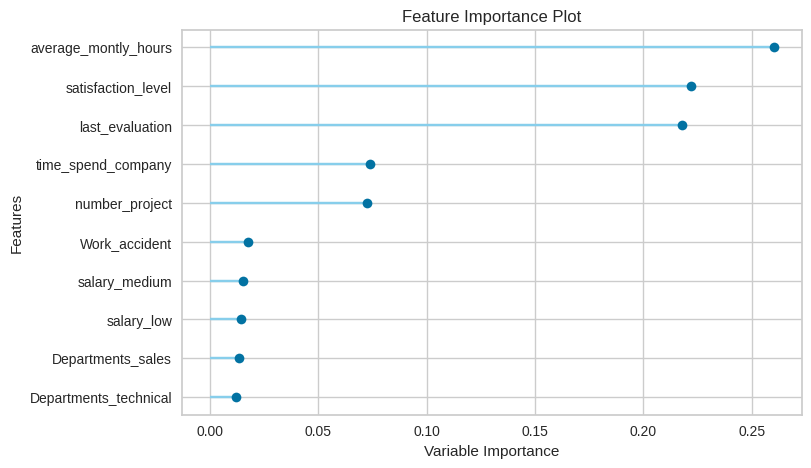

In [18]:
plot_model(rf_model, plot = 'feature')

In [20]:
# Create a feature table

rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_sales', 'Departments_hr',
       'Departments_technical', 'Departments_support', 'Departments_IT',
       'Departments_product_mng', 'Departments_marketing',
       'Departments_accounting', 'Departments_management',
       'Departments_RandD', 'salary_low', 'salary_medium', 'salary_high'],
      dtype=object)

In [21]:
rf_model.feature_importances_

array([0.2218257 , 0.21802557, 0.07227876, 0.26013659, 0.07383701,
       0.01769742, 0.00546982, 0.01323602, 0.00770256, 0.01212235,
       0.01085469, 0.00920967, 0.00873309, 0.00792671, 0.007674  ,
       0.00679418, 0.00818768, 0.01443613, 0.01503371, 0.00881833])

In [23]:
import pandas as pd
feature_table = pd.DataFrame(zip(rf_model.feature_names_in_,rf_model.feature_importances_), columns = ['feature', 'importance'])
feature_table

,feature,importance
0,satisfaction_level,0.221826
1,last_evaluation,0.218026
2,number_project,0.072279
3,average_montly_hours,0.260137
4,time_spend_company,0.073837
5,Work_accident,0.017697
6,promotion_last_5years,0.005470
7,Departments_sales,0.013236
8,Departments_hr,0.007703
9,Departments_technical,0.012122


In [24]:
feature_table.to_gbq('employeedata.feature_table', project_id, chunksize=None, if_exists = 'replace')

<ipython-input-24-484a7b5a29ca>:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_gbq except for the argument 'destination_table' will be keyword-only.
  feature_table.to_gbq('employeedata.feature_table', project_id, chunksize=None, if_exists = 'replace')
<ipython-input-24-484a7b5a29ca>:1: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  feature_table.to_gbq('employeedata.feature_table', project_id, chunksize=None, if_exists = 'replace')
100%|██████████| 1/1 [00:00<00:00, 3331.46it/s]
